The first 5 rows of dataset:

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


The features(X):

 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    

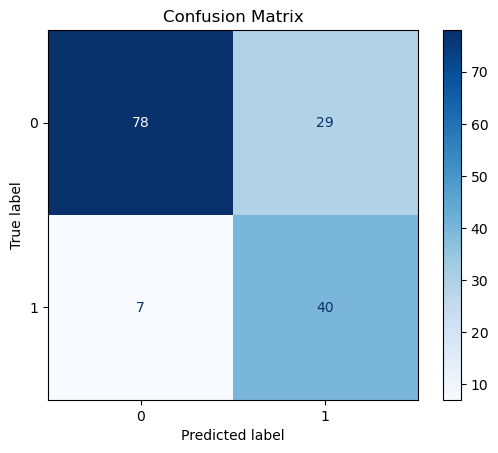

In [99]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


#getting the dataset
data = pd.read_csv('diabetes.csv')

#displaying first 5 rows of the dataset
print(f"The first 5 rows of dataset:\n\n {data.head(5)}\n\n")


#splitting the features(X) and labels(Y)
X = data.drop('Outcome', axis=1).values
Y = data['Outcome'].values

print(f"The features(X):\n\n {X}\n\n")
print(f"The labels(Y):\n\n {Y}\n\n")

#converting the labels to -1,1 instead of 0,1 to fit in the algorithm
Y = np.where(Y == 0, -1, 1)

print(f"The labels(Y) after converting 0,1 to -1,1:\n\n {Y}\n\n")

#Scaling for experimental analysis

#Scaling features using StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

#Scaling features using MinMaxScaler
scaler =MinMaxScaler()
X = scaler.fit_transform(X)

# Adding bias term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

print(f"The features(X) after adding bias term:\n\n {X}\n\n")

#weight vector, W initialised
W = np.zeros(X.shape[1])

#splitting dataset into training(80%) and testing(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Number of iterations, T
T=1000
#changing the iterations for experimental analysis
#T=1500

#Learning rate, n
n = 0.01

#function for perceptron training
def training_perceptron(X,Y,W,n,T):
    for t in range(T):
        for x in range(len(X)):
            #checking the requirement to update weight
            if Y[x] * np.dot(X[x], W) <= 0:
                #updating the weight as per perceptron algorithm
                W = W + n * Y[x] * X[x]
    return W

#Training the model to get trained weight vector , w_train
W_train = training_perceptron(X_train, Y_train, W, n, T)

#displaying the trained weights
print(f"The trained weight vector(W):\n\n {W_train}\n\n")

#function for percepton prediction
def perceptron_prediction(X, W):
    return np.sign(np.dot(X, W))

#predict the test set
Y_predict = perceptron_prediction(X_test, W_train)

#converting -1,1 to 0,1 
Y_predict = np.where(Y_predict == -1, 0, 1)

#Displaying the predictions
print(f"Predictions of test set(Y_predict):\n\n {Y_predict}\n\n")

#Calculating accuracy, acc
acc = accuracy_score(np.where(Y_test == -1,0,1), Y_predict)
#converting accuracy to percentage
acc_percentage = acc * 100
#Displays the accuracy in percentage rounded to 2 decimal places
print(f"Accuracy in percentage rounded to 2 decimal places is:\n\n {round(acc_percentage,2)}%\n\n")

#Calculating precision, precision
precision = precision_score(np.where(Y_test == -1,0,1), Y_predict)
#converting precision to percentage
precision_percentage = precision * 100
#Displays the precision in percentage rounded to 2 decimal places
print(f"precision in percentage rounded to 2 decimal places is:\n\n {round(precision_percentage,2)}%\n\n")

#Calculating recall, recall
recall = recall_score(np.where(Y_test == -1,0,1), Y_predict)
#converting recall to percentage
recall_percentage = recall * 100
#Displays the recall in percentage rounded to 2 decimal places
print(f"recall in percentage rounded to 2 decimal places is:\n\n {round(recall_percentage,2)}%\n\n")

#Calculating f1_score, f1_score_
f1_score_ = f1_score(np.where(Y_test == -1,0,1), Y_predict)
#converting f1_score to percentage
f1_score_percentage = f1_score_ * 100
#Displays the F1-score in percentage rounded to 2 decimal places
print(f"F1-score in percentage rounded to 2 decimal places is:\n\n {round(f1_score_percentage,2)}%\n\n")

#Performance Parameters Report, perf_param_report
perf_param_report = classification_report(np.where(Y_test == -1,0,1), Y_predict)
print(f"Performance parameter report is:\n\n {perf_param_report}%\n\n")


#the confusion matrix, confusion_matrix
conf_matrix = confusion_matrix(np.where(Y_test == -1,0,1), Y_predict)
#plots the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
#setting the title
plt.title("Confusion Matrix")
print(f"The confusion matrix plot:")
plt.show()
